# Mon 1er Réseau Neuronal

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg">

## Description: 
- Choisir un Dataset simple et clean. 
- Choisir de faire une régression ou classification. 
- Construire le réseau neuronal avec l'exemple suivant. 
- Les hidden layers pourrons avoir des fonctions d'activation "relu".

## Rendu: 
- Présentation schematique du réseau neuronal
- Présentation du notebook
    - La construction du réseau
    - Les résultats obtenus
    - Le scoring

### **Environnement: installation des packages**

In [1]:
# !pip install tensorflow
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import warnings
import matplotlib.pyplot as plt
from codes_pkges.opersfunctions import*
from codes_pkges.functions import *
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings('ignore')

- **Choix du dataset simple & clean**

In [18]:
data = sns.load_dataset("diamonds")
check_missing_values(data)

"Il n'y a pas de valeurs manquantes dans le dataset."

In [45]:
shape(data)

This dataset contains:
--> 53940 lignes
--> 10 colones
--> RangeIndex(start=0, stop=53940, step=1)


In [46]:
stats(data)

,mean,25%,50%,75%,count
carat,0.797940,0.40,0.70,1.04,53940.0
depth,61.749405,61.00,61.80,62.50,53940.0
table,57.457184,56.00,57.00,59.00,53940.0
price,3932.799722,950.00,2401.00,5324.25,53940.0
x,5.731157,4.71,5.70,6.54,53940.0
y,5.734526,4.72,5.71,6.54,53940.0
z,3.538734,2.91,3.53,4.04,53940.0


In [19]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- **Choisir de faire une régression ou classification.**

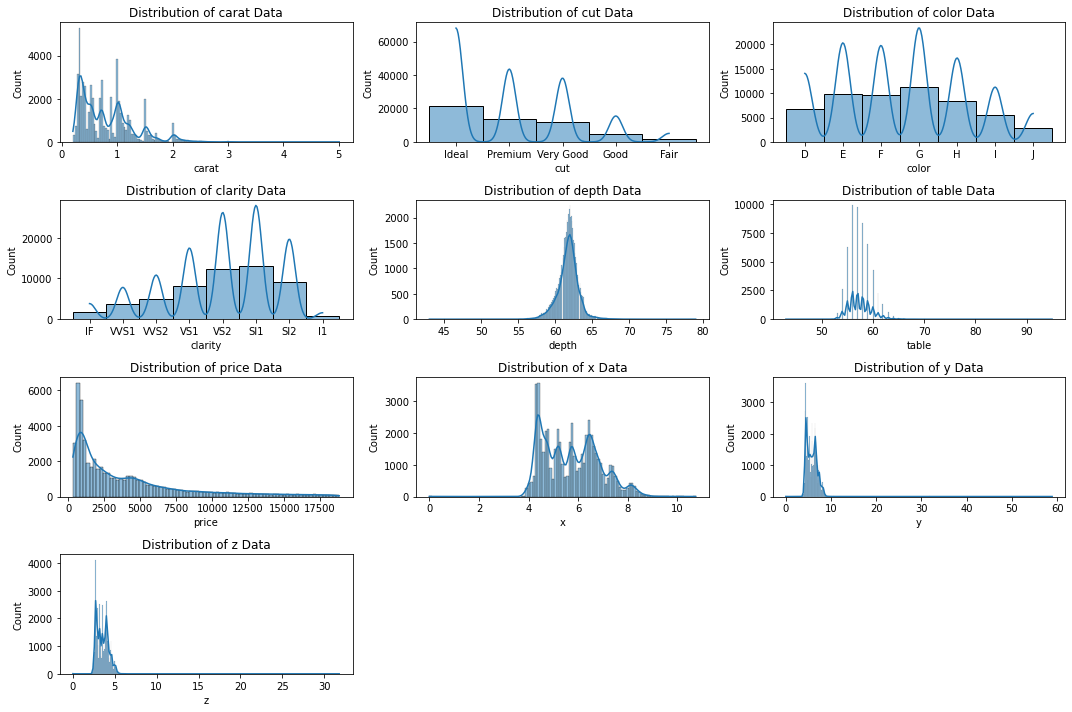

In [20]:
ditrib_df(data)

  - *Cette dataset est souvent utilisée pour faire des analyses et des prédictions de prix en fonction des différentes variables disponibles.*
  - Choix: regression lineaire

- **Construire le réseau neuronal avec l'exemple suivant:**

In [21]:
from tensorflow.keras import *

2023-05-04 14:53:45.513885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-04 14:53:45.523117: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
from tensorflow.keras import Sequential, layers

In [23]:
# Prétraiter les données
# Encodage des variables catégorielles
data_dummies= pd.get_dummies(data, columns=['cut', 'color', 'clarity'])


In [24]:
data_dummies.head(3)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Normalisation des variables continues
scaler = StandardScaler()
data_dummies[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(data_dummies[['carat', 'depth', 'table', 'x', 'y', 'z']])


In [26]:
data_dummies.head(3)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,-1.587837,-1.536196,-1.571129,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.240361,-1.360738,1.585529,326,-1.641325,-1.658774,-1.741175,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.198168,-3.385019,3.375663,327,-1.498691,-1.457395,-1.741175,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# Séparation des données en ensemble d'entraînement et ensemble de test
X = data_dummies.drop('price', axis=1).values
y = data_dummies['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Définition de l'architecture du modèle neuronal
model_test = Sequential()
model_test.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_test.add(layers.Dense(32, activation='relu'))
model_test.add(layers.Dense(1, activation='linear'))

In [42]:
# Compilation et entraînement du modèle
model_test.compile(loss='mean_squared_error', optimizer='adam')
model_test.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1349/1349 [==============================] - 6s 4ms/step - loss: 10341314.0000
Epoch 2/50
1349/1349 [==============================] - 5s 4ms/step - loss: 1627138.6250
Epoch 3/50
1349/1349 [==============================] - 6s 4ms/step - loss: 1197563.5000
Epoch 4/50
1349/1349 [==============================] - 5s 3ms/step - loss: 1036468.8125
Epoch 5/50
1349/1349 [==============================] - 5s 3ms/step - loss: 956452.5625
Epoch 6/50
1349/1349 [==============================] - 5s 3ms/step - loss: 894742.3125
Epoch 7/50
1349/1349 [==============================] - 5s 4ms/step - loss: 836014.5625
Epoch 8/50
1349/1349 [==============================] - 5s 4ms/step - loss: 788878.2500
Epoch 9/50
1349/1349 [==============================] - 5s 3ms/step - loss: 744838.4375
Epoch 10/50
1349/1349 [==============================] - 5s 4ms/step - loss: 709107.5000
Epoch 11/50
1349/1349 [==============================] - 5s 3ms/step - loss: 680875.0625
Epoch 12/50
1349/1349 [==

In [43]:
# Évaluation des performances du modèle sur l'ensemble de test
loss = model_test.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f' % loss)

MSE: 380162.625


In [47]:
model_test.fit(X_train, y_train, epochs=25, batch_size=8, verbose=1)

Epoch 1/25
5394/5394 [==============================] - 22s 4ms/step - loss: 399955.2500
Epoch 2/25
5394/5394 [==============================] - 22s 4ms/step - loss: 398005.4688
Epoch 3/25
5394/5394 [==============================] - 21s 4ms/step - loss: 395769.2188
Epoch 4/25
5394/5394 [==============================] - 21s 4ms/step - loss: 394536.5312
Epoch 5/25
5394/5394 [==============================] - 21s 4ms/step - loss: 391998.5312
Epoch 6/25
5394/5394 [==============================] - 22s 4ms/step - loss: 391464.4688
Epoch 7/25
5394/5394 [==============================] - 20s 4ms/step - loss: 389062.0000
Epoch 8/25
5394/5394 [==============================] - 20s 4ms/step - loss: 388961.7500
Epoch 9/25
5394/5394 [==============================] - 20s 4ms/step - loss: 387295.4062
Epoch 10/25
5394/5394 [==============================] - 19s 4ms/step - loss: 386228.5000
Epoch 11/25
5394/5394 [==============================] - 19s 4ms/step - loss: 384118.1562
Epoch 12/25
5394/53

In [44]:
model_test.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1728      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### *Optimisation en changeant les paramètres du model*

In [48]:
# Définition de l'architecture du modèle neuronal
model_opt = Sequential()
model_opt.add(layers.Dense(10, input_dim=15, activation='relu'))
model_opt.add(layers.Dense(3, activation='relu'))
model_opt.add(layers.Dense(3, activation='linear'))

In [49]:
# Compilation et entraînement du modèle
model_opt.compile(loss='mean_squared_error', optimizer='adam')
model_opt.fit(X_train, y_train, epochs=25, batch_size=8, verbose=1)

Epoch 1/25


ValueError: in user code:

    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 15), found shape=(8, 26)


In [ ]:
# Évaluation des performances du modèle sur l'ensemble de test
loss = model_opt.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f' % loss)

In [4]:
# Ex:
# X de 15 features
# y target de 3 dim

In [30]:
# ### Regression of size 4
# model = Sequential()
# model.add(layers.Dense(10, activation='relu', input_dim=15))
# #model.add(...)
# model.add(layers.Dense(3, activation='linear'))

In [32]:
### Classification with 8 classes
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=15))
#model.add(...)
model.add(layers.Dense(3, activation='softmax'))

In [6]:
# Ex:
# X de 9 features
# y target de 1 dim

In [36]:
### Regression of size 4
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=9))
#model.add(...)
model.add(layers.Dense(1, activation='linear'))


### Classification with 8 classes
model = Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=9))
#model.add(...)
model.add(layers.Dense(1, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                100       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = 'accuracy')

In [39]:
model.fit(X, y, batch_size=16, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/hope/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 26)


In [ ]:
model.evaluate(scaler.transform(X), y)

In [ ]:
model.predict(scaler.transform(X))